# 確率と統計

形は様々ですが、機械学習が行っていることはすべて予測です。患者の臨床歴を考慮して、来年に心臓発作に苦しむであろう患者の*確率*を予測することができます。異常検出では、飛行機が正常に動作している場合に、ジェットエンジンからの一連の測定値がとりうる値を評価することができます。強化学習では、環境下でエージェントが知的に行動することを望むでしょう。これは、利用可能な各行動の下で、高い報酬を得る確率について考えることを意味します。また、推薦システムを構築する際も確率について考慮する必要があります。たとえば、大規模なオンライン書店で*仮に*働いていたとします。ある顧客が特定の本を購入する確率を推定したいと考えるでしょう。このためには、確率と統計という言語を使用する必要があります。あらゆるコース、専攻、学位論文、キャリア、さらには学科まで、確率に深く関わっているのです。したがって当然ですが、この節の目標はこのトピック全体について説明することではありません。代わりに、最初の機械学習モデルを構築するために必要な部分だけ説明し、あとは必要に応じて読者が自分自身で情報を探し求められるようにしたいと思います。


前の節では、確率を正確に説明したり、具体的な例を挙げたりすることはしませんでしたが、すでに確率については話をしていました。写真からイヌとネコを区別する問題について、より深く考えてみましょう。これは簡単に聞こえるかもしれませんが実際は手ごわいです。まず、イヌとネコを区別する問題の難易度は画像の解像度に依存する場合があります。



| 10px | 20px | 40px | 80px | 160px |
|:----:|:----:|:----:|:----:|:-----:|
|![](../img/whitecat10.jpg)|![](../img/whitecat20.jpg)|![](../img/whitecat40.jpg)|![](../img/whitecat80.jpg)|![](../img/whitecat160.jpg)|
|![](../img/whitedog10.jpg)|![](../img/whitedog20.jpg)|![](../img/whitedog40.jpg)|![](../img/whitedog80.jpg)|![](../img/whitedog160.jpg)|

人間は320ピクセルの解像度で猫と犬を簡単に認識できますが、40ピクセルでは難しく、10ピクセルではほとんど不可能になります。言い換えると、猫と犬を遠距離で区別する (つまり解像度が低い状態で区別する) 能力は、十分な情報が与えられていない状況での推測に近いとも言えます。確率は、私たちの確信する度合いについて説明する、形式的な方法を提供します。画像に猫が写っていることを完全に確信している場合、対応するラベル$l$が$\mathrm{cat}$であるという*確率* $P(l=\mathrm{cat})$が1.0に等しいことを意味します。$l = \mathrm{cat}$または$l=\mathrm{dog}$を示唆する証拠がなかった場合、両者に判定される確率は等しく二分され、$P(l = \mathrm{cat})= 0.5$になります。ある程度確信はあるが、画像に猫が写っているかどうかわからない場合は、$.5 <P(l =\mathrm{cat})<1.0$の確率が割り当てられるでしょう。


次に、2つ目のケースを考えてみましょう。いくつかの気象観測データから、明日台北で雨が降る確率を予測したいと思います。夏の場合、$.5$の確率で雨になるとします。画像の分類と天気予報、どちらの場合も注目している値があり、そして、どちらの場合も結果については不確かであるという共通点があります。
しかし、2つのケースには重要な違いがあります。最初のケースでは、画像は実際には犬または猫のいずれかであり (ランダムなわけではない)、ただそのどちらかが分からないだけです。 2番目のケースでは、私達が思っているように (そしてほとんどの物理学者も思っているように)、結果はランダムに決まる事象です。したがって、確率は、私たちの確信の度合いを説明するために用いられるフレキシブルな言語であり、幅広いコンテキストで効果的に利用されています。

## 確率理論の基礎

サイコロを投げて、別の数字ではなく$1$が表示される可能性を知りたいとします。サイコロが公平なものであれば、6種類の出目$\mathcal{X} = \{1, \ldots, 6\}$がすべて同様に発生する可能性があり、$6$つの場合の数のうち$1$つが$1$として観測されるでしょう。正式に記述すれば、$1$は確率$\frac{1}{6}$で発生するといえるでしょう。

工場から受け取った実際のサイコロについて、それらの比率がわからない可能性があれば、偏りがないかどうかを確認する必要があります。サイコロを調査する唯一の方法は、サイコロを何度も振って結果を記録することです。サイコロを振るたびに値\{1, 2, \ldots, 6\}$を観察します。これらの結果を考慮して、各出目を観測する確率を調査したいと思います。

それぞれの確率を求める際の自然なアプローチとして、各出目の出現回数をカウントし、それをサイコロを投げた総回数で割ることです。これにより、特定のイベントの確率の*推定*を得ることができます。大数の法則では、サイコロを振る回数が増えると、潜在的な真の確率に推定の確率がますます近づくことが示されています。ここで何が起こっているか、詳細に入りこむ前に、試すことから始めてみましょう。

まず、必要なパッケージをインポートします。

In [1]:
import mxnet as mx
from mxnet import nd
import numpy as np
from matplotlib import pyplot as plt

次に、サイコロを振れるようにします。統計では、確率分布からデータ例を引いてくるこのプロセスを*サンプリング*と呼びます。確率をいくつかの離散的な選択肢に割り当てる分布は*多項分布*と呼ばれます。*分布*のより正式な定義については後ほど述べますが、抽象的な見方をすると、イベントに対する単なる確率の割り当てと考えてください。MXNetでは、まさに相応しい名前をもった`nd.random.multinomial`という関数によって、多項分布からサンプリングすることができます。 この関数はさまざまな方法で呼び出すことができますが、ここでは最も単純なものに焦点を当てます。 単一のサンプルを引くためには、単純に確率のベクトルを渡します。

In [2]:
probabilities = nd.ones(6) / 6
nd.random.multinomial(probabilities)


[3]
<NDArray 1 @cpu(0)>

上記のサンプラーを何度も実行すると、毎回ランダムな値を取得することがわかります。サイコロの公平性を推定する場合と同様に、同じ分布から多くのサンプルを生成することがよくあります。 Pythonの`for`ループでこれを行うと耐えられないほど遅いため、`random.multinomial`は複数のサンプルを一度に生成することをサポートし、任意のshapeをもった独立したサンプルの配列を返します。

In [3]:
print(nd.random.multinomial(probabilities, shape=(10)))
print(nd.random.multinomial(probabilities, shape=(5,10)))


[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[[2 2 1 5 0 5 1 2 2 4]
 [4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]]
<NDArray 5x10 @cpu(0)>


サイコロの出目をサンプリングする方法がわかったので、1000個の出目をシミュレーションすることができます。その後、1000回サイコロを振った後に、各出目が出た回数を数えます。

In [4]:
rolls = nd.random.multinomial(probabilities, shape=(1000))
counts = nd.zeros((6,1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals

まず、$1000$回振った最終結果を見てみましょう。

In [5]:
totals / 1000


[0.167 0.168 0.175 0.159 0.158 0.173]
<NDArray 6 @cpu(0)>

結果を見ると、いずれの出目についても最小の確率は$0.15$で、最大の確率は$0.188$となっています。公平なサイコロからデータを生成したので、各出目は$1/6$の確率、つまり$.167$で現れることがわかっていますので、これらの推定値は非常に良いです。確率がれらの推定値にどのように収束していくかを可視化することもできます。

まず、shapeが`(6, 1000)`の配列`counts`を見てみましょう。各時間ステップ (1000回中)、 `counts`はその出目が何回現れたかを表しています。したがって、 そのカウントを表すベクトルの$j$番目の列を、サイコロを振った回数で正規化すれば、ある時点における`現在の`推定確率を求めることができます。カウントを表すobjectは以下のようになります。

In [6]:
counts


[[  0.   0.   0. ... 165. 166. 167.]
 [  1.   1.   1. ... 168. 168. 168.]
 [  0.   0.   0. ... 175. 175. 175.]
 [  0.   0.   0. ... 159. 159. 159.]
 [  0.   1.   2. ... 158. 158. 158.]
 [  0.   0.   0. ... 173. 173. 173.]]
<NDArray 6x1000 @cpu(0)>

振った回数で正規化すると、以下を得ることができます。

In [7]:
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])


[0. 1. 0. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.  0.  0.5 0. ]
<NDArray 6 @cpu(0)>

[0.1980198  0.15841584 0.17821783 0.18811882 0.12871288 0.14851485]
<NDArray 6 @cpu(0)>


ご覧のとおり、最初にサイコロを振った際は、数字の1つが$1.0$の確率で現れ、他の数字が$0$の確率となるような極端な推論が得られます。$100$回振ると、もう少しまともな結果を見ることができます。グラフ化パッケージ `matplotlib` を使用して、この収束を視覚化することができます。 インストールしていない場合は、[インストール](https://matplotlib.org/)をお勧めします。

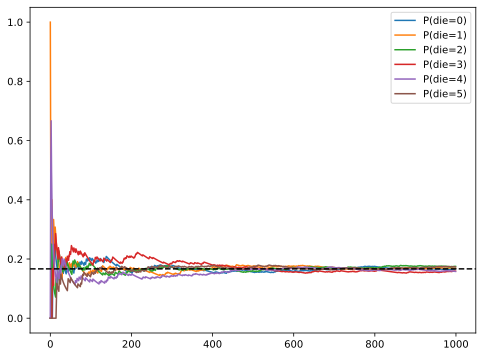

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

各実線の曲線は、サイコロの6つの出目のうちの1つに対応しており、1000回振ったあとに評価される出目の確率を表します。黒い破線は、潜在的な真の確率を示しています。より多くのデータを取得すると、実線の曲線は真の解に向かって収束します。

サイコロを振る例では**確率変数**の概念を導入しました。$X$として表される確率変数は、ほぼすべての値を取る可能性があり決定的ではありません。確率変数はとりうる可能性の集合の中から1つの値をとることができます。その集合を角括弧で示します（例：$\{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit} \}$）。集合に含まれる項目は*要素*と呼ばれ、$x\in S$と書くことで、要素$x$は集合Sに*含まれる*といえます。記号$\in$は"in"と読まれ、集合の要素であることを示します。たとえば、$\mathrm{dog} \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit} \}$と確実に言うことができます。サイコロの出目を扱うとき、変数$X \in \{1, 2, 3, 4, 5, 6 \}$について関心があるといえるでしょう。

サイコロの面のような離散確率変数と、人の体重や身長のような連続確率変数との間には微妙な違いがあることに注意してください。 2人の人の身長がまったく同じかどうかを尋ねても意味がありません。十分に正確な測定を行うと、地球上の2人の人がまったく同じ身長にならないことがわかります。実際、十分に細かい測定を行った場合、目覚めたときと寝ているときの身長は同じになりません。そのため、ある人の身長が$ 2.00139278291028719210196740527486202 $メートルである確率について尋ねる人はまずいないでしょう。世界人口を考えると確率は事実上0です。この場合、誰かの身長が1.99から2.01メートルの間など、指定された間隔に収まるかどうかを確認する方が理にかなっています。こういった場合、可能性を*密度*という見える値で定量化します。ちょうど2.0メートルの高さをとる確率はありませんが、密度はゼロではありません。任意の2つの異なる高さの間には、ゼロ以外の確率があります。

覚えておくべき確率に関する重要な公理を以下に示します。

* 任意の事象 $z$ について, その確率は必ず非負となります。つまり $\Pr(Z=z) \geq 0$。
* 任意の2つの事象 $Z=z$ と $X=x$ について、その結合事象は各事象の和ほど、起こりうることはありません。つまり$\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$。
* どの確率変数も、その値をとるすべての確率の和は必ず1です。つまり、$\sum_{i=1}^n \Pr(Z=z_i) = 1$。
* 相互に排他的な2つの事象$Z=z$ と $X=x$ について、どちらかが起こる確率は、それぞれの確率の和に等しい。つまり$\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=x)$。

## 複数の確率変数の取り扱い

一度に複数の確率変数を扱いたくなることが多くあります。例えば、病気と症状の関係をモデル化したい場合を考えましょう。例えば、「インフルエンザ」と「せき」のような病気と症状が与えられていて、ある確率で患者に発生したり、しなかったりするとします。その双方の確率がゼロであることを望みますが、その確率と関係性を推定することで、その推論をより良い医療看護につなげることができるでしょう。

より複雑な例としては、数百万ピクセルの画像は、数百万の確率変数を含んでいると言えます。多くの場合、画像の中に写る物体を表すラベルを伴います。ラベルもまた確率変数と考えることができます。さらには、すべてのメタデータを確率変数と考えることもできるでしょう。例えば、場所、時間、レンズの口径、焦点距離、ISO、集束距離、カメラの種類などです。これらはすべて、同時に発生する確率変数です。複数の確率変数を扱う場合、いくつかの重要な概念があります。 1つ目は結合分布$\Pr(A,B)$です。結合分布は、$a$と$b$の要素が与えられたとき、$A=a$と$B=b$が同時に発生する確率を示します。あらゆる$a, b$に対して、$\Pr(A=a, B=b) \leq \Pr(A=a)$が成立することに注意してください。

これはつまり、$A$と$B$が発生するためには、$A$が発生して、*かつ*、$B$も発生する必要があるからです (逆も同様です)。したがって、$A, B$が個別に発生するよりも、$A$と$B$が同時に発生することはありません。これによって、$0 \leq \frac{\Pr(A,B)}{\Pr(A)} \leq 1$ という、確率の比に関する興味深い式を導くことができます。これを**条件付き確率**と呼び、$\Pr(B|A)$で表します。$A$が発生する条件のもとで$B$が発生する確率を表します。
$ A $が発生しました。

条件付き確率の定義にもとづいて、ベイズ統計学で最も有用かる有名な方程式の1つを導くことができます。定義より $\Pr(A, B) = \Pr(B | A) \Pr(A)$ となり、対称性より $\Pr(A,B) = \Pr(A | B) \Pr(B)$ も成立します。これらの式から、条件付き確率に関して解くと、次のようになります。

$$ \Pr(A | B)= \frac{\Pr(B|A) \Pr(A)}{\Pr(B)} $$


This is very useful if we want to infer one thing from another, say cause and effect but we only know the properties in the reverse direction. One important operation that we need, to make this work, is **marginalization**, i.e., the operation of determining $\Pr(A)$ and $\Pr(B)$ from $\Pr(A,B)$. We can see that the probability of seeing $A$ amounts to accounting for all possible choices of $B$ and aggregating the joint probabilities over all of them, i.e.

これは、原因と結果など、あるものを別のものから推測したいが、逆方向の特性しかわからない場合に非常に便利です。これを実現するために必要となる重要な操作として **marginalization (周辺化)** があります。つまり、$\Pr(A,B)$から$\Pr(A)$および$\Pr(B)$を決定することです。$A$を確認する確率は、$B$のすべての可能性を考慮し、それらすべてに関する結合確率を集約することで得られます。

$$\Pr(A) = \sum_{B'} \Pr(A,B') \text{ and
} \Pr(B) = \sum_{A'} \Pr(A',B)$$


チェックすべきもう一つの特性として、**dependence(依存性)**と**independence(独立性)**があります。独立性とは、あるイベントの発生が発生しても、他のイベントの発生に関する情報が明らかにならないことを意味します。この場合、$\Pr(B | A) = \Pr(B)$です。統計学者は通常、これを $A \perp\!\!\!\perp B$ と表現します。ベイズの定理から、すぐに$\Pr(A | B) = \Pr(A)$であることがわかります。その他の場合は、すべて、$A$および$B$に依存する (dependence) ことになります。たとえば、サイコロを連続で2回振ったときの出目は独立しています。一方、照明スイッチの位置と部屋の明るさは独立していません (ただし、電球、停電、またはスイッチが破損する可能性が常にあるため、
独立しているかどうかは完全に決定論的とはいえません)。

ここまで学んだことを試してみましょう。医師が患者にエイズ検査を実施するとします。このテストはかなり正確であり、患者が健康であるにもかかわらず、感染していると誤診する確率は、たったの1%しかありません。また、患者が実際にHIVに感染していれば、HIVの検出に失敗することはありません。診断を$D$、HIVの感染の有無を$H$で表します。$\Pr(D|H)$を表として表すと次のようになります。

|結果| HIV 陽性 | HIV 陰性 |
|:------------|-------------:|-------------:|
|検査 陽性|            1 |0.01 |
|検査 陰性|            0 |         0.99 |

条件付き確率は一般の確率と同様に足して1になる必要があるため、列方向の和はすべて1となる（ただし、行方向は1とならない）ことに注意してください。陽性の結果がでたときに、患者がAIDSに感染している確率を計算しましょう。明らかに、この計算にはこの病気がどれくらい一般的かに依存するでしょう。なぜなら、それによって誤検知の値が変わるからです。ここでは、母集団が非常に健康的な場合を考え、$\Pr(\text{HIV positive}) = 0.0015$としましょう。ベイズの定理を適用すると

$$\begin{aligned}
\Pr(\text{Test positive}) =& \Pr(D=1 | H=0) \Pr(H=0) + \Pr(D=1
| H=1) \Pr(H=1) \\
=& 0.01 \cdot 0.9985 + 1 \cdot 0.0015 \\
=& 0.011485
\end{aligned}
$$

したがって、

$$\begin{aligned} \Pr(H = 1 | D = 1) =& \frac{\Pr(D=1 | H=1) \Pr(H=1)}{\Pr(D=1)} \\ =& \frac{1 \cdot 0.0015}{0.011485} \\ =& 0.131 \end{aligned} $$

言い換えれば、検査の結果が99%正しいにも関わらず、患者が実際にAIDSに感染している確率は13.1%にすぎないことがわかります。このように統計は直感に反することがあります。

## 条件付き独立

もし、患者が上記のようなおそろしいニュースを聞いたとしたらどうするでしょうか。おそらく、医者に対して、より正確な結果を得るための、追加のテストを実施するよう依頼するでしょう。2回目のテストはさきほどのテストとは異なる特徴があるとしましょう（そして最初よりも精度が悪いです）

結果 |  HIV 陽性 |  HIV 陰性 |
|:------------|--------------:|--------------:|
|テスト 陽性|          0.98 |0.03 |
|テスト 陰性|          0.02 |          0.97 |

残念ながら、2回目も陽性だったとしましょう。ベイズ理論を利用して必要な確率を計算しましょう。

* $\Pr(D_1 = 1 \text{ and } D_2 = 1 | H = 0) = 0.01 \cdot 0.03 = 0.0003$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1 | H = 1) = 1 \cdot 0.98 = 0.98$
* $\Pr(D_1 = 1 \text{ and } D_2 = 1) = 0.0003 \cdot 0.9985 + 0.98 \cdot 0.0015 = 0.00176955$
* $\Pr(H = 1 | D_1 = 1 \text{ and } D_2 = 1) = \frac{0.98 \cdot 0.0015}{0.00176955} = 0.831$

2回目の検査によって、HIVの感染に関してより確信を得ることができました。2回目の検査は1回目の検査よりもかなり精度が低いにも関わらず、推定の結果を改善しました。*なぜ1回目の検査を2回実施しないのか?*と尋ねたくなるかもしれません。確かに1回目の検査のほうが精度が高かったです。理由は、2回目の検査の結果が1回目の検査の結果と独立しているからです。言い換えれば、$\Pr(D_1, D_2 | H) = \Pr(D_1 | H) \Pr(D_2 | H)$ という暗黙の仮定をおいています。統計学者はこのような確率変数を*条件付き独立*と呼び、$D_1 \perp\!\!\!\perp D_2  | H$ で表します。

## サンプリング

確率モデルを扱うとき、データから分布を推定するだけではなく、分布からのサンプリングでデータを生成することがよくあります。もっとも単純な乱数のサンプリングの方法として、`random`のメソッドを Python の `random` のパッケージから呼び出す方法があります。

In [9]:
import random
for i in range(10):
    print(random.random())

0.6036385367038083
0.13871793845387892
0.7400706939731865
0.9469325324825094
0.8199007484651116
0.5781257831529599
0.2412202100431512
0.6849391424869673
0.1556186843881321
0.0003905581628786958


### 一様分布

上記で生成した値はランダムに*見えます*。その値の範囲は0から1までで一様に分布します。一様乱数からデフォルトで生成した値なので、$[0,1]$でサイズが同じ部分的な区間を2つとったとき、どちらかの区間が、一方の区間よりも数字が起こりやすいということはありません。言い換えれば、$[0.2,0.3)$ に発生する数の確率と、 $[.593264, .693264)$で発生する数の確率は同じです。実際、これらの値は擬似乱数なので、計算機はランダムな整数を生成して、それを範囲の最大値で割ることで乱数を生成しています。直接整数の乱数を生成したいときは、次のコードを実行します。これは1から100までの範囲の整数を生成します。

In [10]:
for i in range(10):
    print(random.randint(1, 100))

5
33
23
1
10
21
51
41
48
37


``randint``が本当に一様かどうかチェックする方法はあるでしょうか? 直感的に、一番良い方法はたくさんの数、例えば100万回サンプリングして、発生した数を1から100までの数値ごとにカウントし、近似的に一様であることを確かめることでしょう。

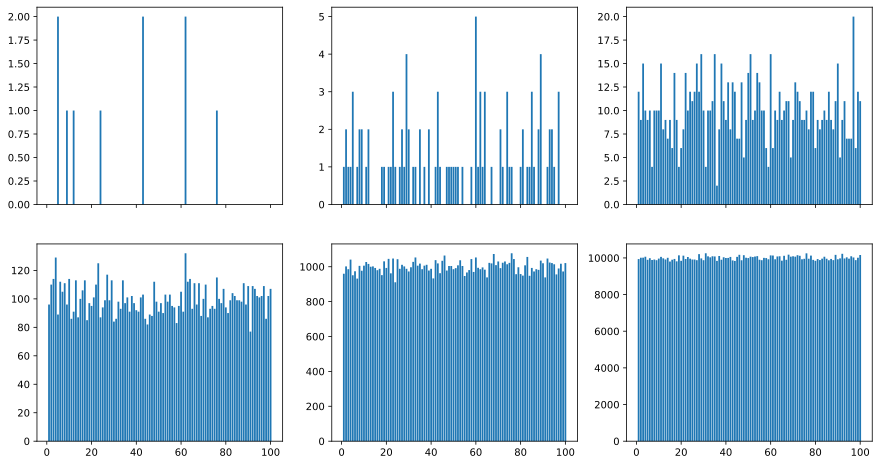

In [11]:
import math
counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.reshape(6)
# Mangle subplots such that we can index them in a linear fashion rather than
# a 2d grid
for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

これらの図から、カウントする最初のほうでは、一様でないことが*際立っています*。100回未満のサンプリングの場合、一様になりそうに見えます。しかし、1000サンプルを超えても、まだ1から100の値には明確な違いが見られます。ここでは、数値 $x$ が発生する確率が  $p(x)$ で与えられる状況を求めています。

### カテゴリカル分布

100回分の数を一様分布から引くことは簡単です。しかし、もし一様分布でないとしたらどうでしょう。単純なケースとして、表が0.35、裏が0.65で出るようなひしゃげたコインを考えましょう。単純な方法は、$[0,1]$の範囲で一様乱数を生成し、その値が0.35未満であれば表とし、そうでなければ裏とします。さあやってみましょう。

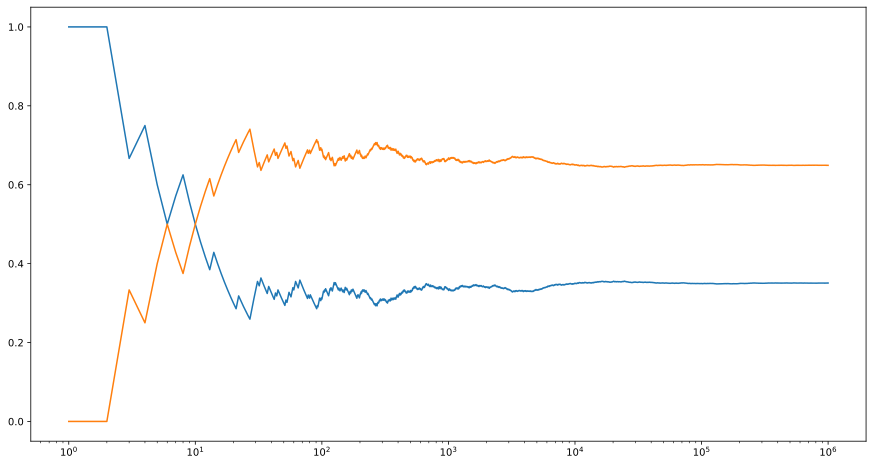

In [12]:
# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)
# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(15, 8))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

図から確認できるように、平均的には35%の確率で0、65%の確率で1をサンプリングしています。では、表と裏だけでなく2つ以上の結果があるとしたらどうでしょう。上記のアイデアを一般化しましょう。ｄののような確率分布、例えば、 $p = [0.1, 0.2, 0.05, 0.3, 0.25, 0.1]$が与えられても、累積分布$F = [0.1, 0.3, 0.35, 0.65, 0.9, 1]$を計算することができます (Python の ``cumsum``を利用できるでしょう)。一様分布 確率変数$U[0,1]$から確率変数$x$のサンプリングを行い、$F[i-1] \leq x < F[i]$となるような区間を探します。そして $i$ を出た結果とします。定義から、$[F[i-1], F[i])$の区間に入る確率は$p(i)$となります。

上記で延べた方法よりも効率的なアルゴリズムは多数存在します。例えば、$n$個の確率変数に対して、Fを探索する2分探索は$O(\log n)$のオーダーで実行できます。より賢いアルゴリズムもあり、例えば、 [Alias Method](https://en.wikipedia.org/wiki/Alias_method) は、$O(n)$の前処理を行うことによって定数時間でサンプリングすることができます。

### 正規分布

標準正規分布 (別名 標準ガウス分布) は、$p(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{1}{2} x^2\right)$として与えられます。体験するために実際にプロットしてみましょう。

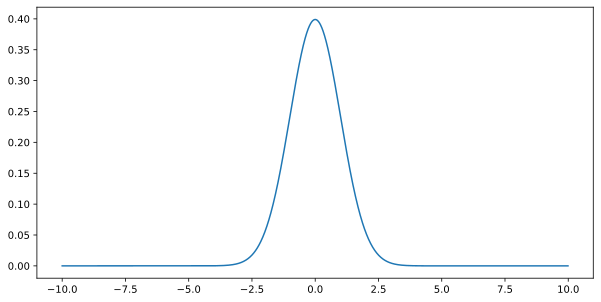

In [13]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

この分布からサンプリングすることは単純ではありません。まず、値の範囲は無限大で、つまりはあらゆる
$x$ に対して、確率密度 $p(x)$ は正の値をとります。次に、確率密度は一様ではありません。そこからのサンプリングにはいくつかの工夫が必要です。あらゆるアルゴリズムで重要となる考え方は、一様分布 $U[0,1]$に対応するように$p(x)$を変換することです。一つの方法は確率積分変換です。

$p$ の累積分布関数 (CDF) を $F(x) = \int_{-\infty}^x p(z) dz$ で表します。これはさきほど利用した累積和の連続系のものです。同様に、$x$ が一様にサンプリングされるような逆写像 $F^{-1}(\xi)$ を定義します。ベクトル$F$のために正しい区間を定める必要があった（区間に区切られた定数の関数を用意した）先ほどとは異なり、関数$F(x)$の逆関数をとります。

実際は、ガウス分布におけるCDFの逆関数を求めることは難しいため、少し複雑なことを行う必要があります。*2次元*積分は簡単に実行することができるため、これによって、1つではなく2つの確率変数を生成し、2つの一様分布の代わりとして利用します。いまのところ、そういった問題を解くためのアルゴリズムがすでにあるという認識で構いません。

正規分布はさらに重要な性質をもっています。どんな分布であっても、そこから十分な数のサンプリングを行い平均をとれば、その分布は正規分布に収束します。より詳細を理解するために、期待値、平均、分散を導入という3つの重要な要素を紹介します。


* 分布$p$の下での関数$f$の期待値$\mathbf{E}_{x \sim p(x)}[f(x)]$は積分$\int_x p(x) f(x) dx$によって得られます。それは、得られるすべての結果に対して、$p$の重みをつけて平均をとったものになります。
* 特に重要な期待値としては関数$f(x) = x$であるような場合で、平均は$\mu := \mathbf{E}_{x \sim p(x)}[x]$となります。これは、$x$において起こりうる値について、いくつかの情報を提供してくれるでしょう。

* さらに重要な値としては分散があり、それは平均からの差分を表す値 $\sigma^2 := \mathbf{E}_{x \sim p(x)}[(x-\mu)^2]$となります。ちょっとした数学を利用することで$\sigma^2 = \mathbf{E}_{x \sim p(x)}[x^2] - \mathbf{E}^2_{x \sim p(x)}[x]$ となることがわかります (練習の項目でチェックしてみてください)。


上記により、確率変数の平均と分散の両方に対して、変更を加えることができます。平均$\mu$の確率変数$x$の関しては、確率変数$x+c$が平均$\mu+c$となることは明らかです。
また、$\gamma x$の分散は、$\gamma^2 \ sigma^2$ となるでしょう。これを正規分布に適用すると、平均$\mu$、分散$\sigma^2$に対して、分布を表す関数は$p(x) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \exp\left(-\frac{1}{2 \sigma^2} (x-\mu)^2\right)$となります。

スケーリングの係数$\frac{1}{\sigma}$は、分布を$\sigma$だけ引き伸ばせば、同じ確率質量を保持するために、分布を$\frac{1}{\sigma}$だけ小さくしなければならないことを表しています (つまり、分布の下の重みを積分すれば1になる必要があります)。

これで、統計の最も基本的な定理の1つである[中心極限定理](https://en.wikipedia.org/wiki/Central_limit_theorem)を説明する準備が整いました。正しい振る舞いをする確率変数、特に明確に定義された平均と分散をもつ確率変数に対して、その合計は正規分布に向かう傾向があります。より理解を深めるために、最初に説明した実験を繰り返しましょう。ただしここでは、整数値が$\{0,1,2\}$の確率変数を使用します。

mean 0.9, variance 0.49


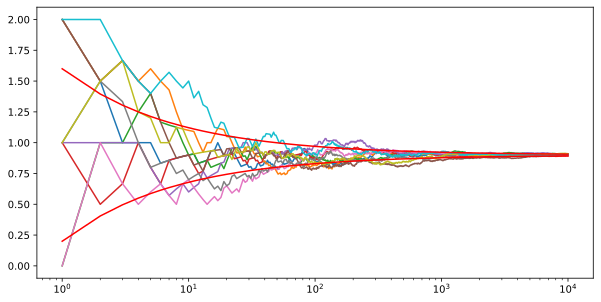

In [14]:
# 10000個の一様に分布した確率変数から10個の系列を生成
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))

# 累積和と正規化
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

plt.figure(figsize=(10,5))
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.show()

これは、少なくとも多数の変数の平均をとるという制限はありますが、最初の例と非常によく似ています。これは理論によって確認されています。確率変数の平均と分散を以下のように表します。

$$\mu[p] := \mathbf{E}_{x \sim p(x)}[x] \text{ and } \sigma^2[p] := \mathbf{E}_{x \sim p(x)}[(x - \mu[p])^2]$$

これによって次を得ることができます。
$\lim_{n\to \infty} \frac{1}{\sqrt{n}} \sum_{i=1}^n \frac{x_i - \mu}{\sigma} \to \mathcal{N}(0, 1)$.
良いかれば、どのような分布で始めたとしても、常にガウス分布に収束するのです。これは、ガウス分布が統計学のなかで良く用いられる一つの理由になっています。

### その他の分布


さらに多くの便利な分布が存在します。さらに詳しく知りたい場合は、統計に関する専門書を参照するか、Wikipediaで一般的な分布を調べて詳細を調べることをお勧めします。知っておくべき重要な分布は次のとおりです。


* **二項分布** 同じ分布からの複数のサンプリングした結果の分布を表現するために使用されます。例えば、ひしゃげたコインを10回投げて(コインは確率$\pi \in [0, 1]$で表がでるものとします)、表が出た数などを表します。その二項分布は$p(x) = {n \choose x} \pi^x (1-\pi)^{n-x}$として表現されます。

* **多項分布** 多くの場合、2つより多くの結果が出る場合を気にするでしょう。例えば、サイコロを複数回振るような場合です。この場合、分布は $p(x) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \pi_i^{x_i}$ として与えられます。

* **ポアソン分布** この分布は、ある割合で起こる単一事象の発生をモデル化します。例えば、ある地域で一定時間内に降る雨粒の数などです (奇妙な事実として、馬に蹴られて殺されたプロイセン兵の数はこの分布に従っています)。割合$\lambda$に対して、生起する確率は $p(x) = \frac{1}{x!} \lambda^x e^{-\lambda}$ として与えられます。

* **ベータ、ディリクレ、ガンマ、およびウィシャートの分布**
これらは、統計学者がそれぞれ二項、多項、ポアソンおよびガウスと*共役*であると呼んでいる分布です。詳細には触れませんが、これらの分布は、後者の分布の係数の事前分布としてよく使用されます。例えば、二項分布の結果の確率をモデル化するための事前分布としてのベータ分布が用いられます。

## まとめ


これまで、確率、独立性、条件付き独立性、およびこれらを使用していくつかの基本的な結論を導く方法について説明しました。また、いくつかの基本的な確率分布を紹介し、Apache MXNetを使用して、それらからサンプリングする方法を示しました。これはすでに強力な知識であり、それ自体は古典的な機械学習モデルを開発する上では十分なものです。次の節では、この知識を活用して、最初の機械学習モデルであるNaive Bayes分類器を構築する方法について説明します。

## 練習

1. 確率$\Pr(A)$と$\Pr(B)$で発生する2つの事象について、$\Pr(A \cup B)$と$\Pr(A \cap B)$の上限と下限を計算してください。ヒント: [ベン図](https://en.wikipedia.org/wiki/Venn_diagram)を利用して状況を表してみましょう。
1. $A, $B$, $C$ という事象の系列があり、$B$は$A$と$C$に依存し、$A$と$C$は$B$のみに依存する場合、その同時確率を単純化することは可能ですか? ヒント: これは[マルコフ連鎖](https://en.wikipedia.org/wiki/Markov_chain)です。

## [議論](https://discuss.mxnet.io/t/2319)のためのQRコードをスキャン

![](../img/qr_probability.svg)